<a href="https://colab.research.google.com/github/adityasengar/ML-for-threat-prediction/blob/main/Security_score_predictor_API_security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code extracts the source data and runs a deep neural network to predict the scores based on the algorithm discussed in the paper.


---

Box #1 imports the relevant libraries.

---

Box #2 imports the data, expands the data using the variable 'expand' and 'iteration_count', and runs the 2 component PCA over the data (Figure 5).

---

Box #3 generates the additional score column using user-defined distributions (chosen from 4 distributions)

---
Box #4 generates the test and training data


---
Box #5 runs the n-componenet PCA analysis and redefines the test and training data based on the results from PCA (Figure 6)


---
Box #6 generates the deep neural network (Figure 9, Figure 10) and compiles it

---

Box #7 Generates the accuracy scores (Table 1, Table 2, Table 3, figure 11).

---
Box #8 genertes the distribution of data in each feature set (Figure 7) and scatter plot between few variables (Figure 8).

---


Box #9 plots the accuracy as the dataset increases (Figure 11)





In [ ]:
#Box 1
#import relevan libraries
import pandas as pd
import numpy as np
import math

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn


from sklearn.preprocessing import MinMaxScaler

from sklearn import svm

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from google.colab import files

from pathlib import Path

!pip install scikeras[tensorflow]

--2022-12-20 14:04:46--  https://raw.githubusercontent.com/adityasengar/ML/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2253410 (2.1M) [text/plain]
Saving to: ‘dataset.csv.3’

dataset.csv.3       100%[===================>]   2.15M  --.-KB/s    in 0.05s   

2022-12-20 14:04:46 (45.3 MB/s) - ‘dataset.csv.3’ saved [2253410/2253410]



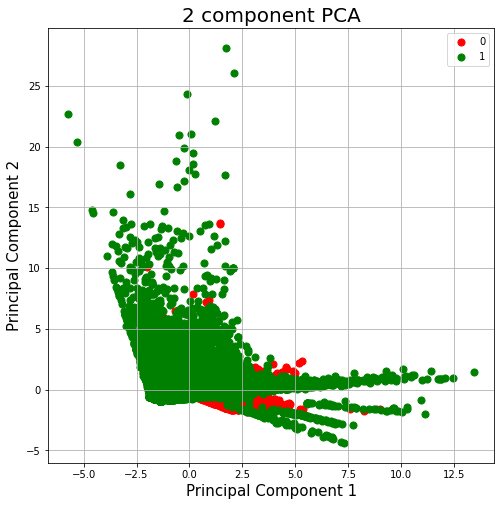

In [ ]:
#Box 2
#Import the dataset and run 2-component PCA over the column name 'score'
!wget 'https://raw.githubusercontent.com/adityasengar/ML/main/dataset.csv'
df=pd.read_csv('dataset.csv')

#Expand dataframe
expand=0
if expand==1:
  columns = df.columns.to_numpy()
  iteration_count = 1 # if this variable is 1, new dataset = 2x original; if this variable is 2, new dataset=3x original...
  new_df = pd.DataFrame(columns=columns)

  for i in range(iteration_count):
      print(i)
      c=0
      for k in df.iterrows():
          data_obj = {}
          for j in range(columns.size):
              random_index = np.random.randint(0,len(df)-1, dtype='int')
              #print(random_index)
              c=c+1
              data_obj[columns[j]] = df.loc[random_index][columns[j]]
          new_df = new_df.append(data_obj, ignore_index=True)

  df = df.append(new_df, ignore_index=True)


#Perform 2 component PCA
from sklearn.preprocessing import StandardScaler

features=['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'num_sessions', 'num_users', 'num_unique_apis', 'source']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['behavior_type']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['behavior_type']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['behavior_type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.savefig('lala.png')
ax.grid()


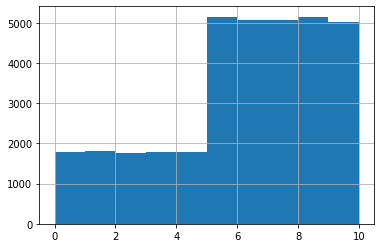

In [ ]:
#Box 3

#Create a new column named "score" and give it values based on behavior type.
discrete=0

import random

if discrete==1:
  binss=10 #number of different output nodes. (20 or 10 is the default we use in our paper)
  def score(value):
    if value ==0:
      p=random.uniform(0,5)
      return (int(p*binss/10))
    else:
      p=random.uniform(5,10)
      return (int(p*binss/10))
  df['score']=df['behavior_type'].map(score)


  aa=['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'num_sessions', 'num_users', 'num_unique_apis', 'source', 'score']
  df= df[aa]
  df['score'].hist(bins=binss)


else:
  uni=1 #1 if score sampled from uniform distribution, 0 is sampled from normal distribution
  def score(value):
    if value ==0:
      if uni==1:
        p=random.uniform(0,5)
      else:
        p = np.random.normal(2.5, 2.5, 1)[0]
      return p
    else:
      if uni==1:
        p=random.uniform(5,10)
      else:
        p = np.random.normal(7.5, 2.5, 1)[0]
      return p
  df['score']=df['behavior_type'].map(score)


  aa=['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'num_sessions', 'num_users', 'num_unique_apis', 'source', 'score']
  df= df[aa]
  df['score'].hist(bins=10)


In [ ]:
#Box 4

#Generate training and test datasets
f=0.75 #fraction of data as training data
df=df.sample(frac=1).reset_index()
countrain=int(f*len(df))
train_df = df.iloc[:countrain,:]
train_df.shape
test_df=df.iloc[countrain:,:]
test_df.shape

#(training data shape, test data shape)
print('train shape, test shape: ',train_df.shape,test_df.shape)

coll=len(df.columns)

training_data = train_df.iloc[: , 0:coll].values
training_data
test_data = test_df.iloc[: , 0:coll].values
test_data.shape

#Scale data between values 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)
test_set_scaled = sc.fit_transform(test_data)

X_train = training_set_scaled[:,0:coll-1]
X_test=test_set_scaled[:,0:coll-1]
y_train=training_set_scaled[:,coll-1:coll]
y_train=training_data[:,coll-1:coll]
y_test=test_set_scaled[:,coll-1:coll]
y_test=test_data[:,coll-1:coll]

train shape, test shape:  (25816, 11) (8606, 11)


(25816, 10)
(25816, 5)


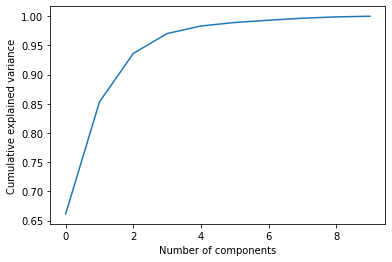

In [ ]:
#Box 5

#Do a proper PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig('Variance_vs_Principal_components.png')

#We identified 5 as the ideal number of features frrom the graph below. This means that data describe is constrained in 5 components
NCOMPONENTS = 5
pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
pca_std = np.std(X_pca_train)

print(X_train.shape)
print(X_pca_train.shape)

In [ ]:
df=pd.DataFrame(np.concatenate((X_pca_train,X_pca_test),axis=0))
df=df.rename(columns={0: "PC1", 1: "PC2", 2: "PC3", 3:"PC4",4:"PC5"})
df['Score']=np.array(np.concatenate((y_train,y_test),axis=0))
df.to_csv(r'PCA_dataset.csv')


In [ ]:
#Box 6

# Initialising the Neural network

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

model = Sequential()

num=128 #Number of nodes in the hidden layers

# Adding the input layer and the first hidden layer
model.add(Dense(num, activation = 'relu', input_dim = NCOMPONENTS))

model.add(Dense(num, activation = 'relu'))
model.add(Dense(num, activation = 'relu'))

model.add(Dense(num, activation = 'relu'))
model.add(Dense(num, activation = 'relu'))

model.add(Dense(num, activation = 'relu'))
model.add(Dense(num, activation = 'relu'))


# Adding the output layer

if discrete==0:
  model.add(Dense(units = 1))
else:
  model.add(Dense(binss, activation='softmax'))
#model.add(Dense(1))
# Compiling the ANN
if discrete==0:
  model.compile(loss='mean_squared_error', optimizer='adam')
else:
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the ANN to the Training set
#model.fit(X_train, y_train, batch_size = 200, epochs = 50)
model.fit(X_pca_train, y_train, epochs=10, batch_size=256, validation_split=0.15, verbose=2)


Epoch 1/10
86/86 - 5s - loss: 9.5310 - val_loss: 4.2702 - 5s/epoch - 61ms/step
Epoch 2/10
86/86 - 1s - loss: 3.9718 - val_loss: 4.2088 - 938ms/epoch - 11ms/step
Epoch 3/10
86/86 - 1s - loss: 3.9434 - val_loss: 4.1838 - 876ms/epoch - 10ms/step
Epoch 4/10
86/86 - 1s - loss: 3.9510 - val_loss: 4.2273 - 925ms/epoch - 11ms/step
Epoch 5/10
86/86 - 1s - loss: 3.9403 - val_loss: 4.2914 - 834ms/epoch - 10ms/step
Epoch 6/10
86/86 - 1s - loss: 3.9540 - val_loss: 4.1726 - 847ms/epoch - 10ms/step
Epoch 7/10
86/86 - 1s - loss: 3.9124 - val_loss: 4.2461 - 933ms/epoch - 11ms/step
Epoch 8/10
86/86 - 1s - loss: 3.9558 - val_loss: 4.1850 - 925ms/epoch - 11ms/step
Epoch 9/10
86/86 - 1s - loss: 3.9220 - val_loss: 4.1684 - 899ms/epoch - 10ms/step
Epoch 10/10
86/86 - 1s - loss: 3.9160 - val_loss: 4.1604 - 875ms/epoch - 10ms/step


In [ ]:
#Box 7

y_pred = model.predict(X_pca_test)

if discrete==1:
  y_class=np.argmax(y_pred,axis=1)
  print(y_class)
  q=[]
  for i in y_test:
    q.append(i[0])
  print(q)

  c=0
  c1=0
  c2=0
  c3=0
  c4=0
  c5=0
  c6=0
  c7=0
  c8=0
  c9=0
  c10=0
  c11=0
  c12=0
  c13=0
  c14=0
  c15=0
  c16=0
  c17=0
  c18=0

  for i in range(0,len(y_class)):
    if y_class[i]==q[i]:
      c=c+1
    if abs(y_class[i]-q[i])==1:
      c1=c1+1
    if abs(y_class[i]-q[i])==2:
      c2=c2+1
    if abs(y_class[i]-q[i])==3:
      c3=c3+1
    if abs(y_class[i]-q[i])==4:
      c4=c4+1
    if abs(y_class[i]-q[i])==5:
      c5=c5+1
    if abs(y_class[i]-q[i])==6:
      c6=c6+1
    if abs(y_class[i]-q[i])==7:
      c7=c7+1
    if abs(y_class[i]-q[i])==8:
      c8=c8+1
    if abs(y_class[i]-q[i])==9:
      c9=c9+1
    if abs(y_class[i]-q[i])==10:
      c10=c10+1
    if abs(y_class[i]-q[i])==11:
      c11=c11+1
    if abs(y_class[i]-q[i])==12:
      c12=c12+1
    if abs(y_class[i]-q[i])==13:
      c13=c13+1
    if abs(y_class[i]-q[i])==14:
      c14=c14+1
    if abs(y_class[i]-q[i])==15:
      c15=c15+1
    if abs(y_class[i]-q[i])==16:
      c16=c16+1
    if abs(y_class[i]-q[i])==17:
      c17=c17+1
    if abs(y_class[i]-q[i])==18:
      c18=c18+1

  print(c/len(y_class))
  print(c1/len(y_class))
  print(c2/len(y_class))
  print(c3/len(y_class))
  print(c4/len(y_class))
  print(c5/len(y_class))
  print(c6/len(y_class))
  print(c7/len(y_class))
  print(c8/len(y_class))
  print(c9/len(y_class))
  print(c10/len(y_class))
  print(c11/len(y_class))
  print(c12/len(y_class))
  print(c13/len(y_class))
  print(c14/len(y_class))
  print(c15/len(y_class))
  print(c16/len(y_class))
  print(c17/len(y_class))
  print(c18/len(y_class))
else:
  import sklearn.metrics as sm
  print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

269/269 [==============================] - 2s 5ms/step
Mean absolute error = 1.61
Mean squared error = 3.98
Median absolute error = 1.43
Explain variance score = 0.43
R2 score = 0.43


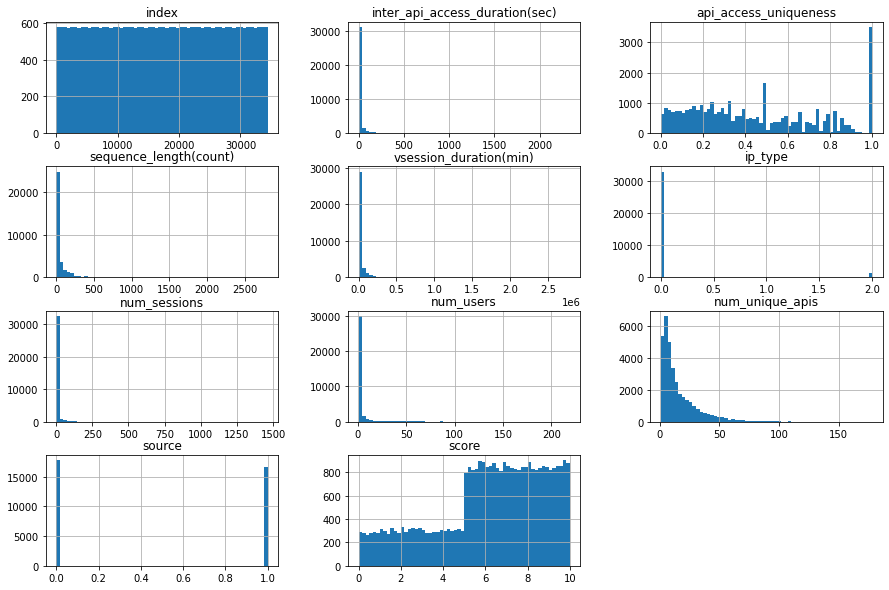

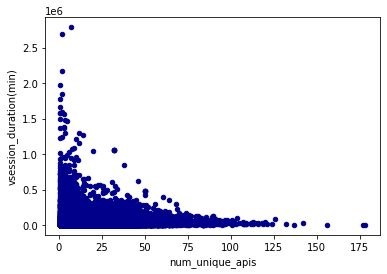

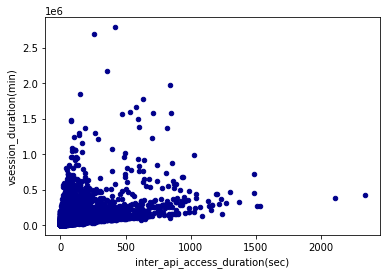

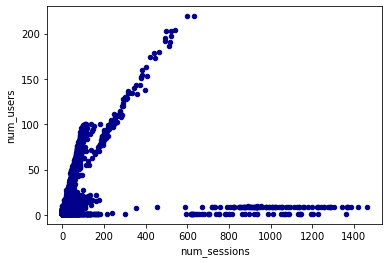

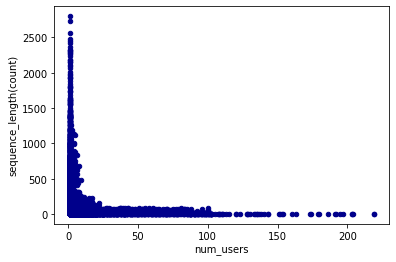

In [ ]:
#Box 8

df.hist(bins=60, figsize=(15, 10))
plt.savefig('Feature_distribution.png')
ax1 = df.plot.scatter(x='num_unique_apis', y='vsession_duration(min)', c='DarkBlue')
plt.savefig('Unique_api_vs_vession_duration.png')
ax1 = df.plot.scatter(x='inter_api_access_duration(sec)', y='vsession_duration(min)', c='DarkBlue')
plt.savefig('Inter_api_access_VS_vsession_duration.png')
ax1 = df.plot.scatter(x='num_sessions', y='num_users', c='DarkBlue')
plt.savefig('num_session_VS_num_users.png')

ax1 = df.plot.scatter(x='num_users', y='sequence_length(count)', c='DarkBlue')
plt.savefig('num_users_VS_sequence_length.png')


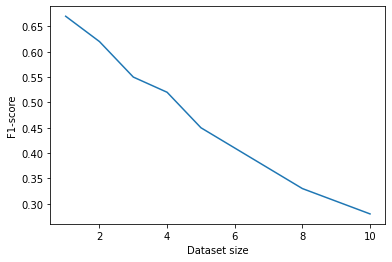

In [ ]:
#Box 9
x = [0.67,0.62,0.55,0.52,0.45,0.41,0.33,0.28]
y = [1,2,3,4,5,6,8,10]
plt.plot(y,x)
plt.xlabel('Dataset size')
plt.ylabel('F1-score')
plt.show()